In [8]:
import numpy as np 
from numpy import random
import pandas as pd 
import seaborn as sns
import scipy 
from scipy.stats import chi2
import math
import sys
from scipy.stats import beta
from scipy.stats import invgamma
import matplotlib.pyplot as plt
#Module pour latex 
#from __future__ import unicode_literals
import matplotlib as mpl
#mpl.rcParams['text.usetex']=True
#mpl.rcParams['text.latex.unicode']=True
#Example plt.title(r"\ $\alpha$",  fontsize=16, color='r')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:151: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: ComplexWarning: Casting complex values to real discards the imaginary part


q= 1 || Prial  =  0.0
q= 1 || Prial  =  -11.237380135274387
q= 2 || Prial  =  3.8376181116106576
q= 2 || Prial  =  -3.9956728742130223
q= 3 || Prial  =  6.72222085947225
q= 3 || Prial  =  4.261368460975844
q= 4 || Prial  =  9.15218854975829
q= 4 || Prial  =  7.722770423794974
q= 5 || Prial  =  9.672568843325088
q= 5 || Prial  =  11.196069128612894
q= 6 || Prial  =  10.981520982198575
q= 6 || Prial  =  14.40563239538401
q= 7 || Prial  =  11.732126034219133
q= 7 || Prial  =  17.20894474572773
q= 8 || Prial  =  12.455528718073715
q= 8 || Prial  =  19.676998021695134
q= 9 || Prial  =  13.396307063363192
q= 9 || Prial  =  21.988649584786558
q= 10 || Prial  =  14.260927732437095
q= 10 || Prial  =  24.146445702308903
q= 11 || Prial  =  15.032455532316455
q= 11 || Prial  =  25.696372190263446
q= 12 || Prial  =  15.325074977278566
q= 12 || Prial  =  26.854299757671036
q= 13 || Prial  =  16.13609491363034
q= 13 || Prial  =  28.136456269260044
q= 14 || Prial  =  16.934330687449407
q= 14 || Prial 

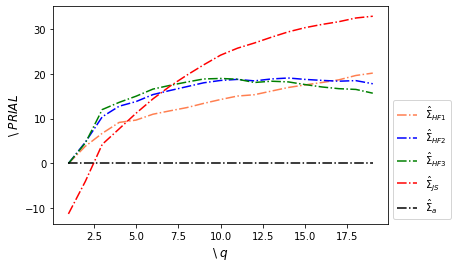

In [23]:
np.random.seed(123)

q_vec=np.arange(0, 19) #np.ones(20)     #   # alpha=1

Prial_K_a_Quad=np.zeros((q_vec.size,3)) # quand alpha=1 Prial_K_a_Quad est un scalaire
Prial_S_a_Quad=np.zeros(q_vec.size)
Prial_JS_Quad=np.zeros(q_vec.size)
for alpha in range(1,4):
  for q in range(1,np.size(q_vec)+1):
    p = 20;
    m= 25;  #m=n
    N=   100
    v= min(q,m) # v=q
    k= max(q,m)  #k=m=n
    s = min(p,m)

    t_K_Quad_loss =2*(v-1) / (k-v+1)   #(2*(v-1) / (k-v+1)  # t_K_Quad_loss=t_1= 2(p-1)/n optimal



    #------------Structure de Sigma-----------
    "-------------Identity----------------------"
    #Sigma=np.identity(p)

    "------------Random--------------------"
    #e =p*np.random.rand(p,p)
    #Sigma= np.dot(e.T,e)
    "-----------Block----------------------"
    #gamma=1.9
    #sigma=np.zeros(p)
    #for i in range(0,p):
    #    sigma[p-1-i]=gamma**i
    #Sigma=np.diag(sigma)
    "----------AR-----------------------"
    #Sigma= np.zeros((p,p))
    #rho=0.9

    #for ii in range(0,p):
    #    for jj in range(0,p):
    #        Sigma[ii,jj] = rho**abs(ii-jj)
    "--------------------real-------------------"
    Sigma=np.loadtxt('/sigma_50.txt')
    "-----------------------------------------"

    #w, V = np.linalg.eig(Sigma)
    #Sigma=np.diag(w)
    lamda, P = np.linalg.eig(Sigma)
    sorted_indices = np.argsort(lamda)
    D = np.identity(p)
    for r in range(0,p):
      D[r,r] = lamda[r]
    for r in range(0,p-q):
      i = sorted_indices[r]
      D[i,i] = 0
    Sigma = P@D@np.linalg.inv(P)
    Sigma_inv=np.linalg.pinv(Sigma)


    np.random.seed(100)
    Loss_Sigma_a_Quad = 0
    Loss_Sigma_K_Quad = 0 
    Loss_Sigma_JS_Quad = 0
    for j in range(0,N): 
        '--- Gaussian case ---'
        U=np.random.multivariate_normal(np.zeros(p), Sigma,m)
        a_Quad_loss = 1 / (k) 
        K_star=1
        #"-----------------------------------------"
        
        '--- Student case ---'
        #ddl=5
        #IG = 1/np.random.gamma(ddl/2,2/ddl, p)
        #Z=np.tile(np.power(IG,.5),(m, 1))
        #X=np.random.multivariate_normal(np.zeros(p), Sigma, m)
        #U= np.multiply(X,Z)
        #K_star =(ddl/2)/( (ddl/2)-1 )
        
        #a_Quad_loss=1/(K_star*k)
        "-----------------------------------------"
        
        '--- Mixture of Beta ---'
        #alpha= .1 #alpha > p\2
        #Beta=  10   #beta > 0
        #R=np.sqrt(np.random.beta(alpha, Beta, p));
        #Z=np.tile(R,(m, 1))
        #X=np.random.multivariate_normal(np.zeros(p), Sigma, m)
        #U= np.multiply(X,Z)
        #K_st=beta.moment(1, alpha, Beta, loc=0, scale=1)
        #a_Quad_loss = 1 / (K_st*k) 
        
        "-----------------------------------------"


        S = np.dot(U.T,U) 
        S_plus = np.linalg.pinv(S) 
        trace_S_plus = np.matrix.trace(S_plus) 
        mu = 1/ trace_S_plus
        [R,V,D] = np.linalg.svd(U)                   # SVD pour U=R'VD afin de construire S= H L_tilde H^T
        #val_propre_S = V*V.T
        L = np.zeros((v,v))
        VV = V*V
        sorted_ind = np.argsort(VV)
        for rr in range(s-v,s):
          i = sorted_ind[rr]
          L[s-rr-1,s-rr-1] = VV[i]
        #L = np.diag(V*V ) # Recuperer L
        H1 = D.T[:,0:v]
        
        Sigma_hat_a_Quad_loss  =   a_Quad_loss *S   #sigma_a optimal
        L_inv_p=(1/np.diag(L**alpha))*np.identity(v)
        trace_S_plus_p=np.matrix.trace(L_inv_p)

        #Phi_K_Quad = L + (beta/ (k*(1+beta)*trace_S_plus))*L_inv
        #gamma=8/(k-v+1)

        Psi_K_Quad = np.identity(v) + (t_K_Quad_loss/trace_S_plus_p)*L_inv_p
        D_JS = 0*Psi_K_Quad
        for it in range (0,v):
          D_JS[it,it] = 1/(m+q-2*it+1)

        Sigma_hat_K =  a_Quad_loss  *( H1@L@Psi_K_Quad@H1.T) # Estimateur de Konno
        Sigma_hat_JS = H1@L@D_JS@H1.T

        valeurs,vecteurs = np.linalg.eig(Sigma_hat_K@Sigma_inv)
        determ = 0
        for vp in valeurs:
          if vp>0.001:
            determ = determ + np.log(vp)
        #Loss_Sigma_K_Quad= Loss_Sigma_K_Quad + np.matrix.trace(Sigma_hat_K@Sigma_inv) - np.log(np.linalg.det(Sigma_hat_K@Sigma_inv))-v
        Loss_Sigma_K_Quad= Loss_Sigma_K_Quad + np.matrix.trace(Sigma_hat_K@Sigma_inv) - determ-v
        Risk_Sigma_K_Quad=(1/N)*(Loss_Sigma_K_Quad)

        valeurs,vecteurs = np.linalg.eig(Sigma_hat_a_Quad_loss@Sigma_inv)
        determ = 0
        for vp in valeurs:
          if vp>0.001:
            determ = determ + np.log(vp)
        #Loss_Sigma_a_Quad = Loss_Sigma_a_Quad + np.matrix.trace(Sigma_hat_a_Quad_loss@Sigma_inv) - np.log(np.linalg.det(Sigma_hat_a_Quad_loss@Sigma_inv))-v
        Loss_Sigma_a_Quad = Loss_Sigma_a_Quad + np.matrix.trace(Sigma_hat_a_Quad_loss@Sigma_inv) - determ-v
        Risk_Sigma_a_Quad=(1/N)*(Loss_Sigma_a_Quad)


        valeurs,vecteurs = np.linalg.eig(Sigma_hat_JS@Sigma_inv)
        determ = 0
        for vp in valeurs:
          if vp>0.001:
            determ = determ + np.log(vp)
        Loss_Sigma_JS_Quad= Loss_Sigma_JS_Quad + np.matrix.trace(Sigma_hat_JS@Sigma_inv) - determ-v
        Risk_Sigma_JS_Quad=(1/N)*(Loss_Sigma_JS_Quad)

    Prial_K_a_Quad[q-1][alpha-1] = 100*( (Risk_Sigma_a_Quad - Risk_Sigma_K_Quad   ) / Risk_Sigma_a_Quad)
    Prial_JS_Quad[q-1] = 100*( (Risk_Sigma_a_Quad - Risk_Sigma_JS_Quad   ) / Risk_Sigma_a_Quad)
    print('q=',q,"||",'Prial  = ',Prial_K_a_Quad[q-1][alpha-1])
    print('q=',q,"||",'Prial  = ',Prial_JS_Quad[q-1])  
#plt.figure(figsize=(4,3.3))

plt.plot(q_vec+1,Prial_K_a_Quad[:,0],'-.',color='coral',label='$\hat{\Sigma}_{HF1}$')
plt.plot(q_vec+1,Prial_K_a_Quad[:,1],'-.',color='blue',label='$\hat{\Sigma}_{HF2}$')
plt.plot(q_vec+1,Prial_K_a_Quad[:,2],'-.',color='green',label='$\hat{\Sigma}_{HF3}$')
plt.plot(q_vec+1,Prial_JS_Quad,'-.',color='red',label='$\hat{\Sigma}_{JS}$')
plt.plot(q_vec+1,Prial_S_a_Quad,'-.',color='black',label='$\hat{\Sigma}_{a}$')
#print('max Prial=', np.max(Prial_K_a_Quad),"the best alpha=",alpha_vec[np.argmax(Prial_K_a_Quad)])
#plt.title('Identity, (n,p)=(15,20)')
plt.xlabel(r"\ $q$",fontsize=12)
plt.ylabel(r"\ $PRIAL$",fontsize=12)
plt.legend(bbox_to_anchor=(1, 0),loc=3)
plt.savefig('/sing_real_pgn.pdf',bbox_inches='tight')
#plt.figure()